In [1]:
import numpy as np
from scipy import spatial
from sko.GA import GA_TSP
import matplotlib.pyplot as plt

## scikit opt for the TSP

(31, 31)


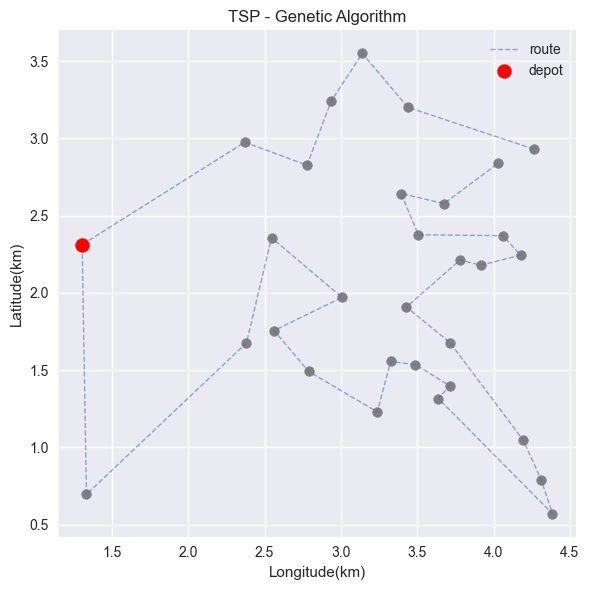

In [26]:
def f(x):
    ''' 
    the objective function:
    input: x is a 2-D array, shape = (n_ind, n_dim)
    output: y = f(x), shape = (n_ind, )
    '''
    num_points,= x.shape
    return sum([distance_matrix[x[i % num_points], x[(i + 1) % num_points]] for i in range(num_points)])

def plotTSP(paths, points):
    '''
    plot the TSP routes
    paths: a list of paths to plot
    points: coordinates of points
    num_iters: number of paths to plot for each iteration, paths[0:num_iters]
    '''
    # plot points
    # plt.style.use('seaborn')
    plt.figure(figsize=(6, 6))
    plt.title('TSP - Genetic Algorithm')
    plt.xlabel('Longitude(km)')
    plt.ylabel('Latitude(km)')
    plt.scatter(points[:, 1], points[:, 2], c='grey', s=50)
    # plot paths
    x = points[paths, 1]
    y = points[paths, 2]
    plt.plot(x, y, linewidth=1, alpha=0.6,linestyle='dashed', zorder=1,label='route')
    # plot the starting point with green
    plt.scatter(points[0, 1], points[0, 2], c='red', s=100, zorder=2,label='depot')
    plt.legend()
    plt.tight_layout()
    plt.show()

points_coordinate = np.loadtxt('../data/tsp.csv', delimiter=',')

num_points, _ = points_coordinate.shape
distance_matrix = spatial.distance.cdist(points_coordinate[:,1:], points_coordinate[:,1:], metric='euclidean')
print(distance_matrix.shape)
ga_tsp = GA_TSP(func=f, n_dim=num_points, size_pop=50, max_iter=800, prob_mut=1)
best_points, best_distance = ga_tsp.run()
plotTSP(best_points, points_coordinate)

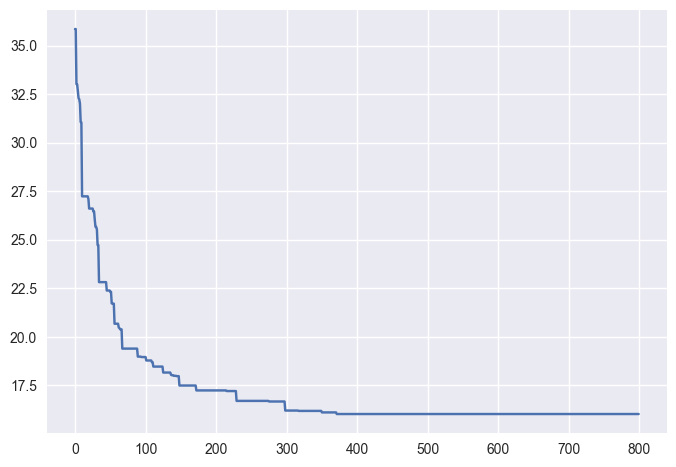

In [27]:
plt.plot(ga_tsp.generation_best_Y)
plt.show()

Scikit opt for the linear programming

[5. 5. 1.]
[-50.]


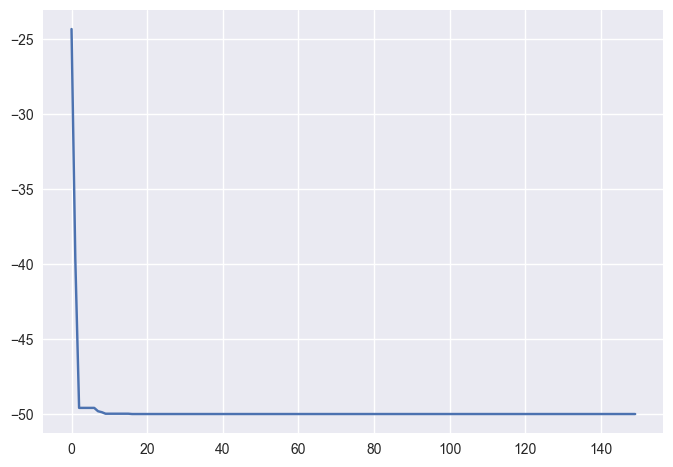

In [36]:
'''
min f(x1, x2, x3) = x1^2 + x2^2 + x3^2
s.t.
    x1*x2 >= 1
    x1*x2 <= 5
    x2 + x3 = 1
    0 <= x1, x2, x3 <= 5
'''
from sko.PSO import PSO
def obj_fun(x):
    ''' 
    x is the particle, shape = (n_dim, )
    '''
    x1, x2, x3 = x
    return -x1 ** 2 - x2 ** 2 -x3 ** 2+1

def eq1(x):
    return 1 - x[1] - x[2]

def ueq2(x):
    return x[1] * x[2] - 5

def ueq(x):
    return x[0] * x[2] - 5

pso = PSO(func=obj_fun, n_dim=3, pop=40, max_iter=150, lb=[0, 0, 0], ub=[5, 5, 5], constraint_eq=[eq1], constraint_ueq=[ueq,ueq2])
x,y = pso.run()
print(x)
print(y)
plt.plot(pso.gbest_y_hist)